In [1]:
import pandas as pd

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

| Column                       | Description                                                                                           |
| ---------------------------- | ----------------------------------------------------------------------------------------------------- |
| `LIMIT_BAL`                  | Amount of given credit (includes individual + family supplement)                                      |
| `SEX`                        | Gender (1 = Male, 2 = Female)                                                                         |
| `EDUCATION`                  | Education level (1 = Graduate school, 2 = University, 3 = High school, 4 = Others)                    |
| `MARRIAGE`                   | Marital status (1 = Married, 2 = Single, 3 = Others)                                                  |
| `AGE`                        | Age in years                                                                                          |
| `PAY_0` to `PAY_6`           | Repayment status from April to September (0 = paid in full, -1 = paid in advance, 1–9 = delay months) |
| `BILL_AMT1` to `BILL_AMT6`   | Amount of bill statement in last 6 months                                                             |
| `PAY_AMT1` to `PAY_AMT6`     | Amount paid in last 6 months                                                                          |
| `default.payment.next.month` | Target variable (0 = no, 1 = yes)                                                                     |


In [82]:
df = pd.read_csv("data.csv", header= 1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [86]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [87]:
df.rename(columns={"default payment next month": "default"},inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [88]:
df.shape

(30000, 25)

In [89]:
df.drop(columns=['ID'],inplace=True)

In [90]:
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [93]:
df.to_csv("D:/Projects/Credit-Card-Fraud_Client_MLOps/notebook/cleaned_data.csv", index=False)

In [28]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [29]:
# Checking class imbalance (Target Variable)
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [31]:
df['default'].value_counts(normalize=True)*100

0    77.88
1    22.12
Name: default, dtype: float64

Text(0.5, 1.0, 'Distribution of Credit Limit')

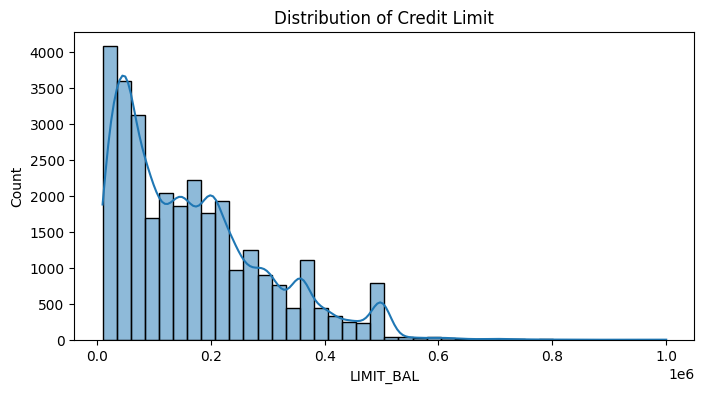

In [35]:
# Distribution of Numerical Features

plt.figure(figsize=(8,4))
sns.histplot(df["LIMIT_BAL"], bins=40, kde=True)
plt.title("Distribution of Credit Limit")

Text(0.5, 1.0, 'Distribution of Age')

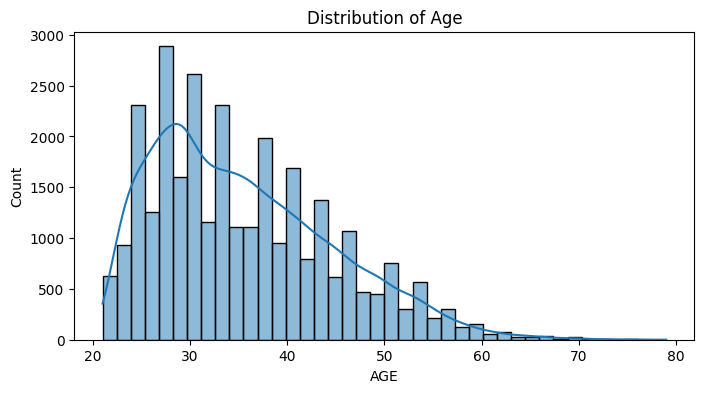

In [43]:
plt.figure(figsize=(8,4))
sns.histplot(df["AGE"], bins=40, kde=True)
plt.title("Distribution of Age")

Text(0.5, 1.0, 'Distribution of Bill amount 1 Limit')

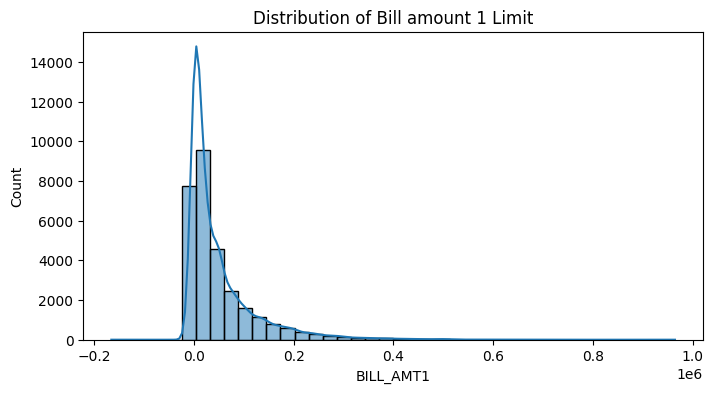

In [44]:
plt.figure(figsize=(8,4))
sns.histplot(df["BILL_AMT1"], bins=40, kde=True)
plt.title("Distribution of Bill amount 1 Limit")

Text(0.5, 1.0, 'Distribution of Pay amount 1 Limit')

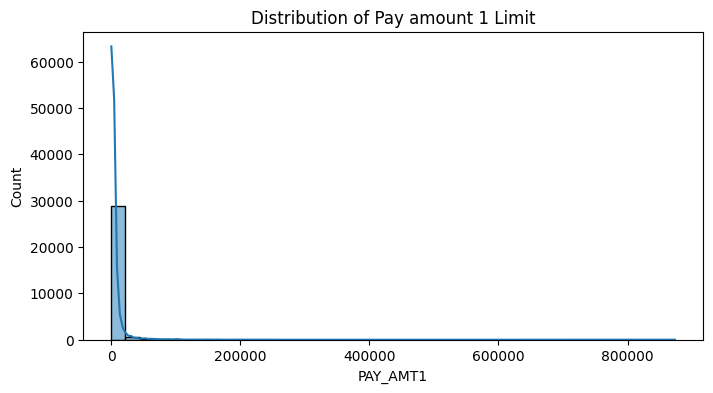

In [45]:
plt.figure(figsize=(8,4))
sns.histplot(df["PAY_AMT1"], bins=40, kde=True)
plt.title("Distribution of Pay amount 1 Limit")

In [41]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Text(0.5, 1.0, 'Distribution of repayment status')

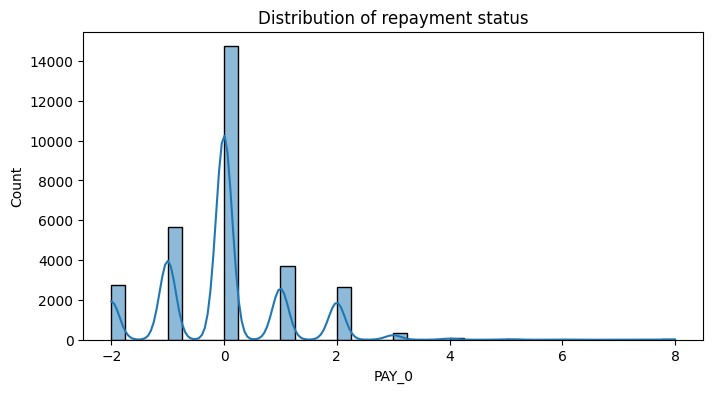

In [46]:
plt.figure(figsize=(8,4))
sns.histplot(df["PAY_0"], bins=40, kde=True)
plt.title("Distribution of repayment status")

Text(0.5, 1.0, 'Repayment Status in September vs Default')

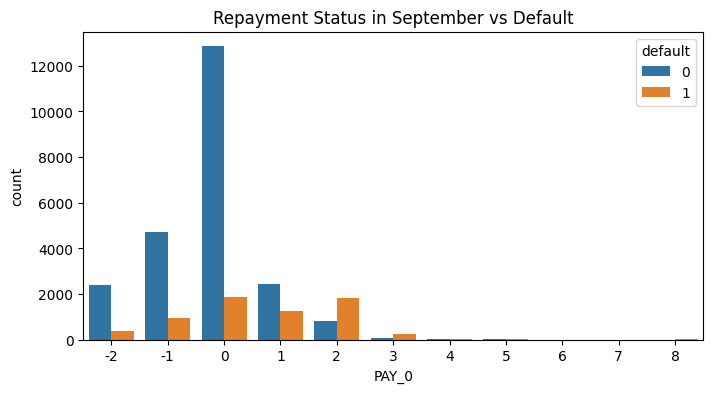

In [47]:
plt.figure(figsize=(8, 4))
sns.countplot(x='PAY_0', hue='default', data=df)
plt.title("Repayment Status in September vs Default")

<Axes: xlabel='SEX', ylabel='count'>

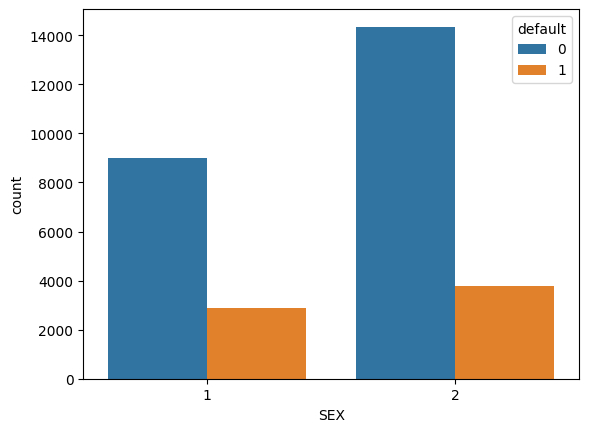

In [48]:
# Categorical Features vs Target

sns.countplot(x="SEX", hue="default", data=df)

<Axes: xlabel='EDUCATION', ylabel='count'>

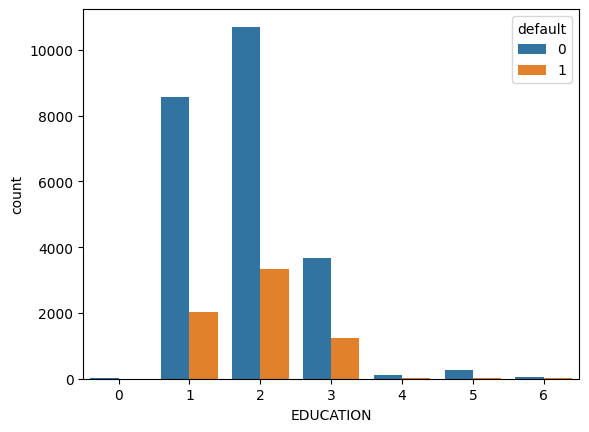

In [49]:
sns.countplot(x="EDUCATION", hue="default", data=df)


<Axes: xlabel='MARRIAGE', ylabel='count'>

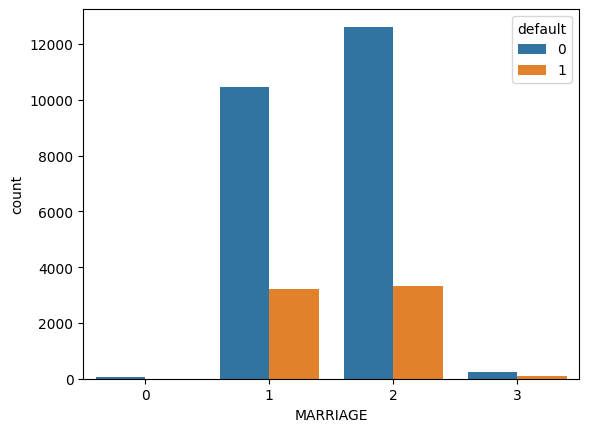

In [50]:
sns.countplot(x="MARRIAGE", hue="default", data=df)


<Axes: >

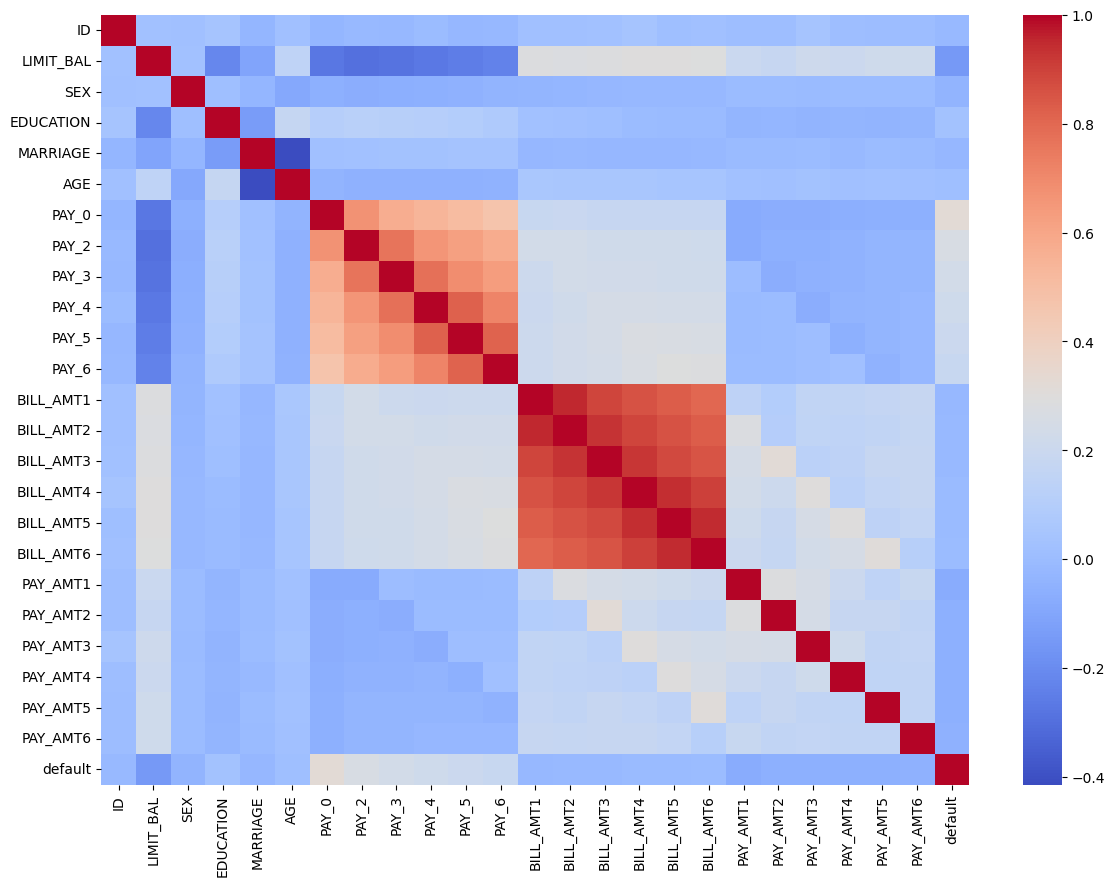

In [51]:
# Correlation Matrix 

plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)


In [53]:
# Checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [55]:
df1 = df.drop('default', axis=1)

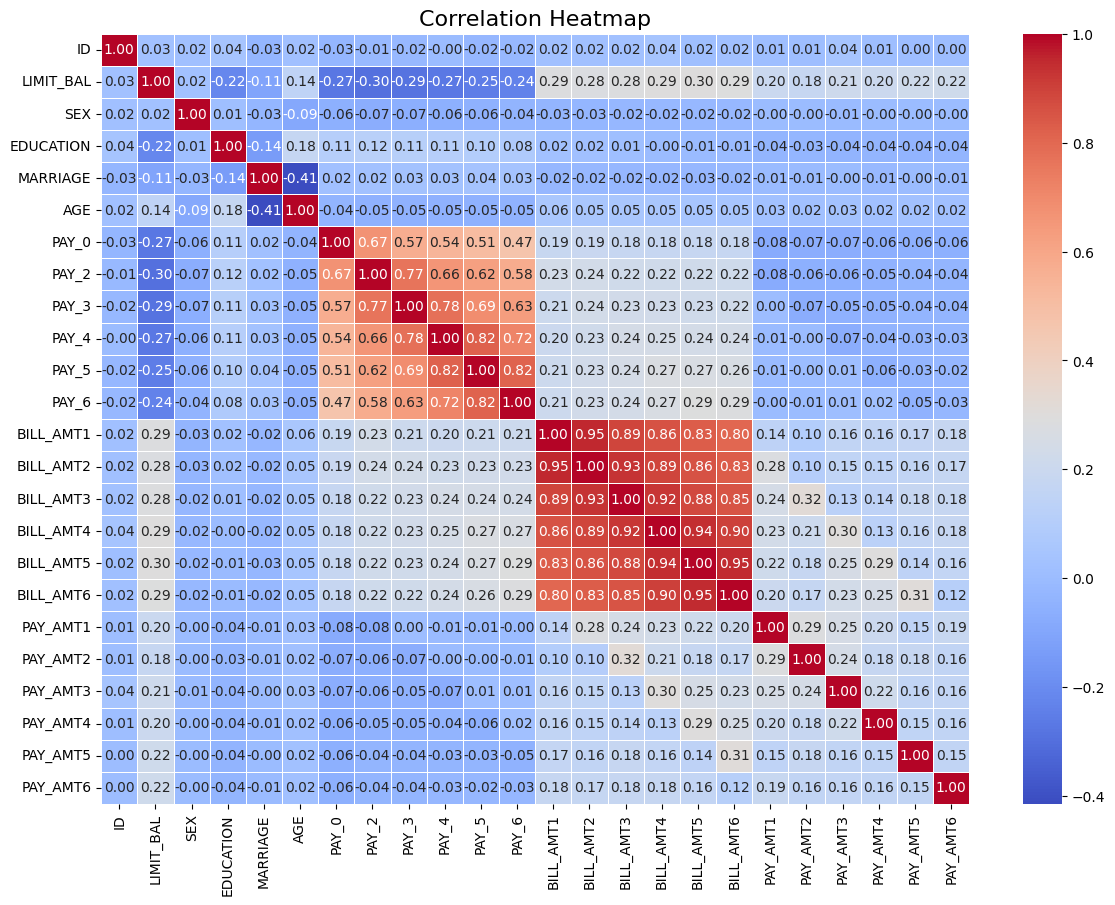

In [57]:
corr_matrix = df1.corr()

plt.figure(figsize=(14, 10))

# Create a heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title for the heatmap
plt.title("Correlation Heatmap", fontsize=16)

# Show the heatmap
plt.show()

In [60]:
# Calculate VIF for each numerical feature 
vif_data = pd.DataFrame()
vif_data["feature"] = df1.columns

# Calculate VIF and round to 4 decimal places
vif_data["VIF"] = [round(variance_inflation_factor(df1.values, i), 4) for i in range(df1.shape[1])]

# Sort VIF values in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif_data)

      feature      VIF
13  BILL_AMT2  38.2267
16  BILL_AMT5  36.0786
14  BILL_AMT3  31.7833
15  BILL_AMT4  29.6995
17  BILL_AMT6  21.4272
12  BILL_AMT1  20.8234
5         AGE  11.2161
2         SEX   9.2472
3   EDUCATION   6.7983
4    MARRIAGE   6.4391
10      PAY_5   4.9898
9       PAY_4   4.4455
1   LIMIT_BAL   4.0464
0          ID   3.9002
8       PAY_3   3.7285
11      PAY_6   3.4639
7       PAY_2   3.2129
19   PAY_AMT2   2.3855
6       PAY_0   1.9191
20   PAY_AMT3   1.9118
18   PAY_AMT1   1.9075
22   PAY_AMT5   1.8547
21   PAY_AMT4   1.8074
23   PAY_AMT6   1.2708


<Axes: xlabel='default', ylabel='AGE'>

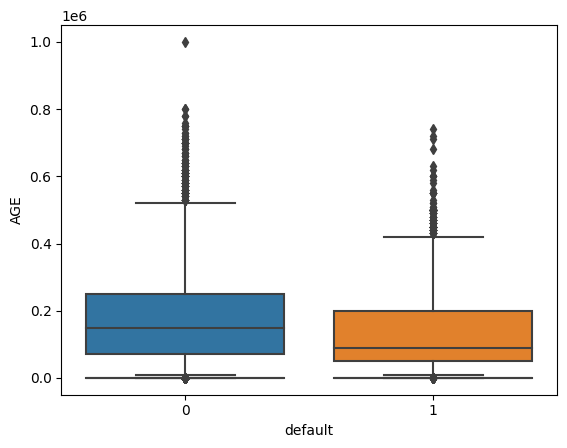

In [61]:
# Boxplots (Default vs features)
sns.boxplot(x='default', y='LIMIT_BAL', data=df)
sns.boxplot(x='default', y='AGE', data=df)


Text(0.5, 0.98, 'Numerical Feature Distributions')

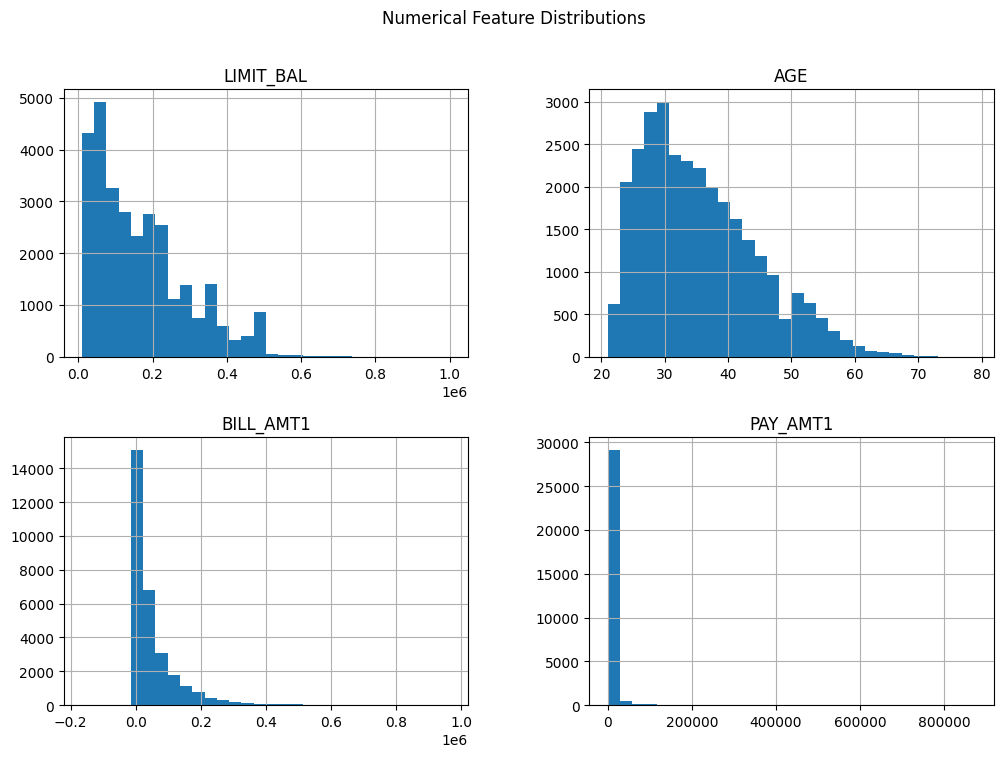

In [74]:
# Numeric distribution


num_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']
df[num_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Numerical Feature Distributions")


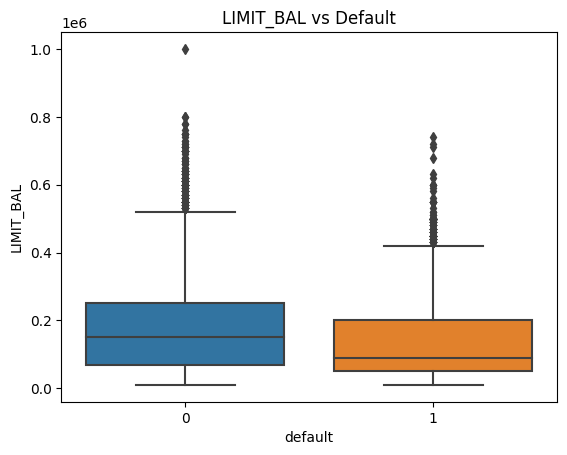

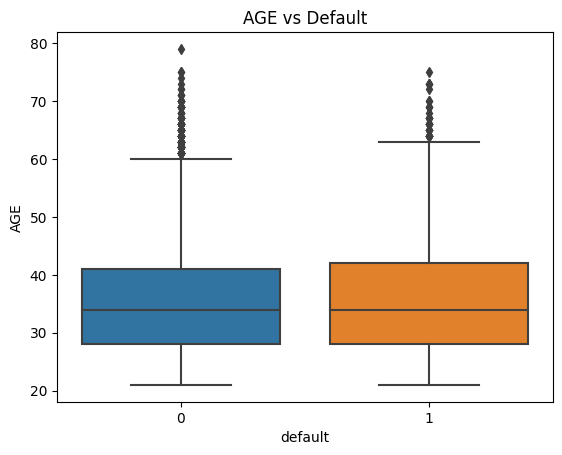

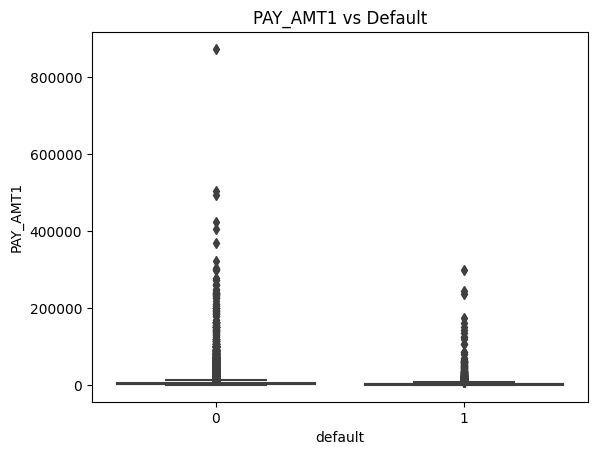

In [73]:
# Boxplots: Numeric vs Target 

for col in ['LIMIT_BAL', 'AGE', 'PAY_AMT1']:
    sns.boxplot(x='default', y=col, data=df)
    plt.title(f"{col} vs Default")
    plt.show()


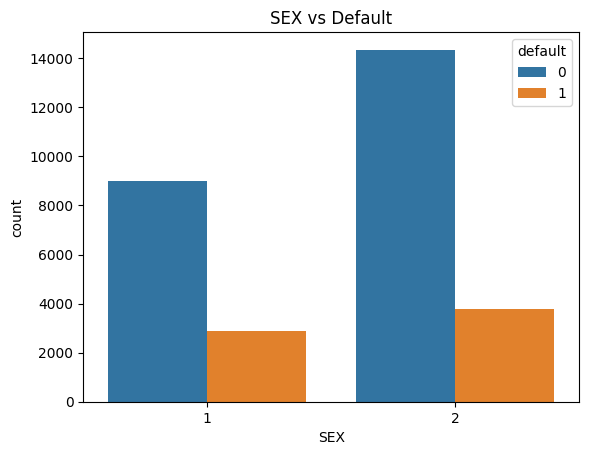

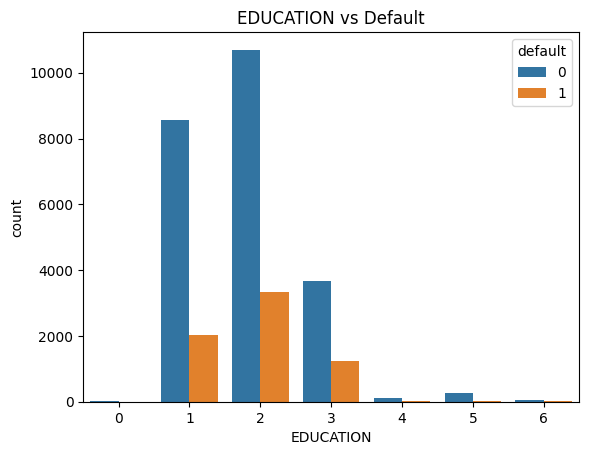

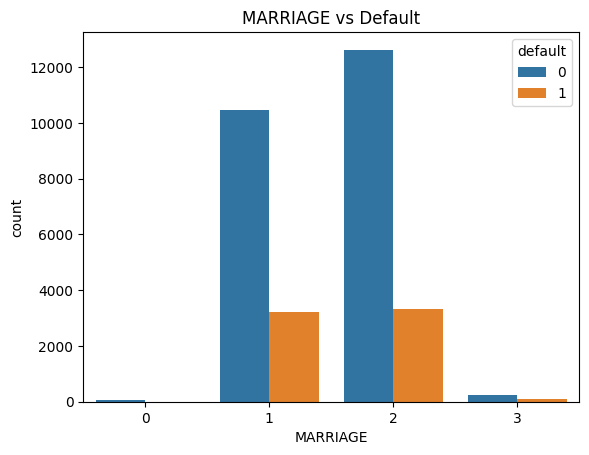

In [ ]:
# Categorical Variables vs

cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
for col in cat_cols:
    sns.countplot(x=col, hue='default', data=df)
    plt.title(f"{col} vs Default")
    plt.show()


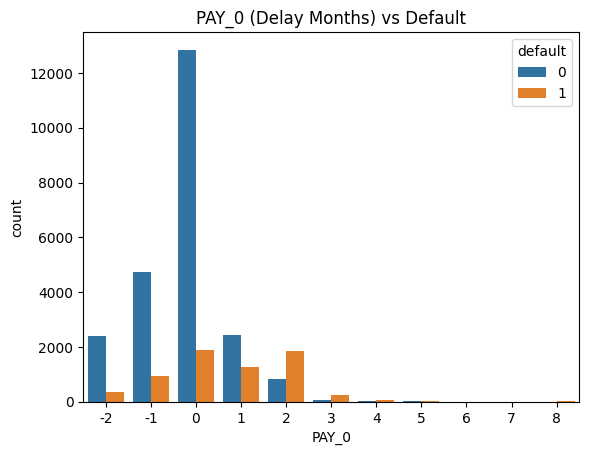

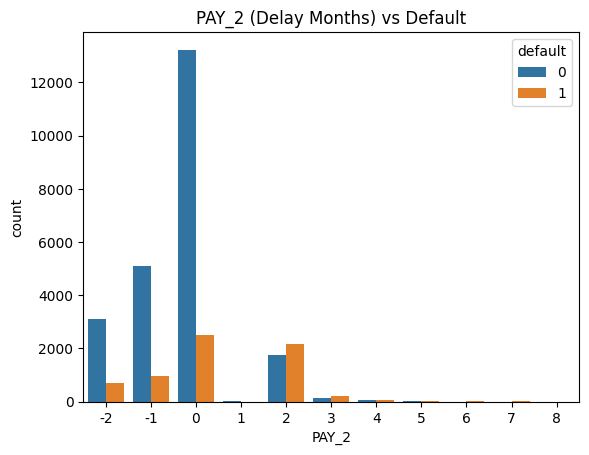

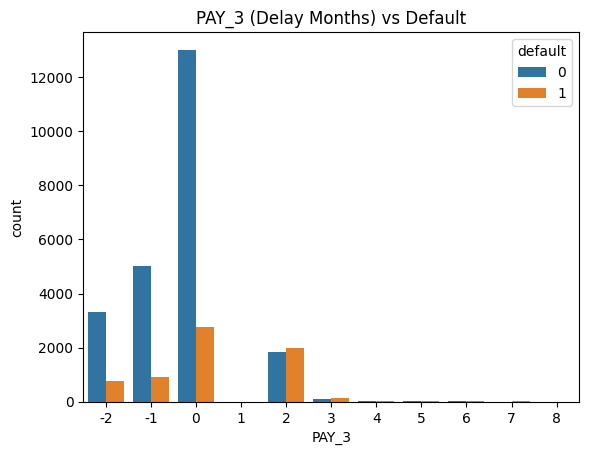

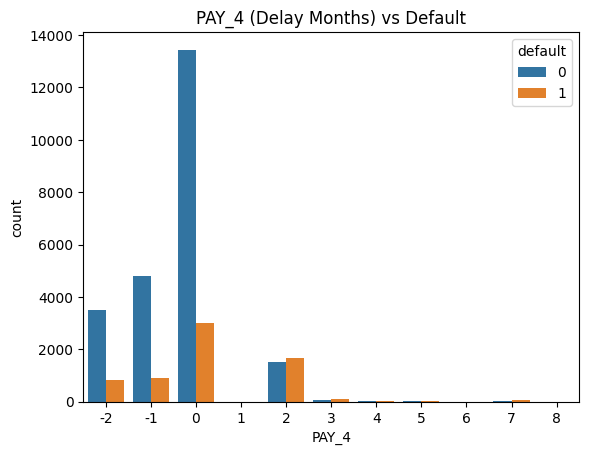

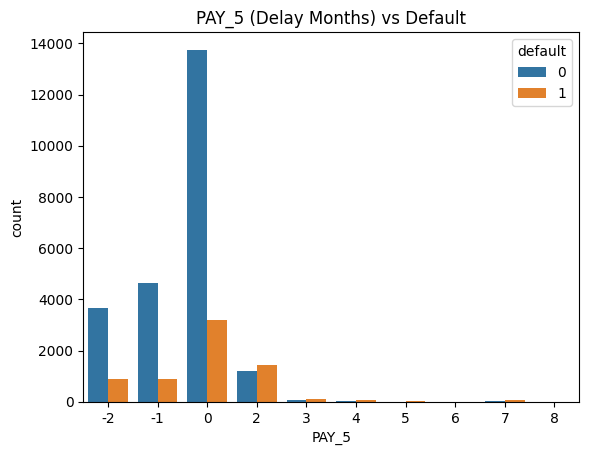

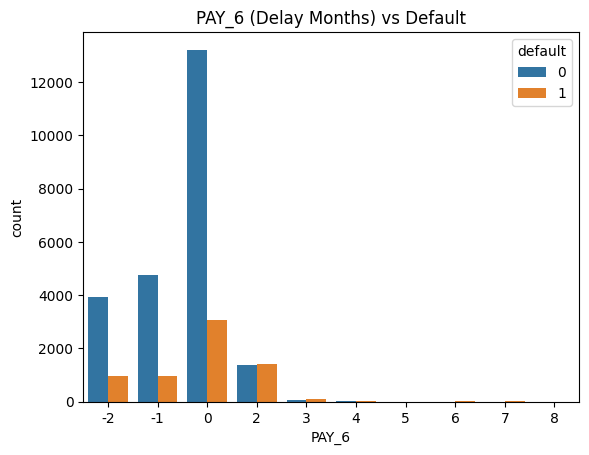

In [ ]:
# Pay analysis
# more positive value = higher risk

pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[pay_cols].apply(pd.Series.value_counts).T  # View common delay values

for col in pay_cols:
    sns.countplot(x=col, hue='default', data=df)
    plt.title(f"{col} (Delay Months) vs Default")
    plt.show()


In [ ]:
# Feature Engineering

avg_pay_amt = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean()
avg_pay_amt

PAY_AMT1    5663.580500
PAY_AMT2    5921.163500
PAY_AMT3    5225.681500
PAY_AMT4    4826.076867
PAY_AMT5    4799.387633
PAY_AMT6    5215.502567
dtype: float64

In [65]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [67]:
utilization_rate = df["BILL_AMT1"]/df["LIMIT_BAL"]
utilization_rate

0        0.195650
1        0.022350
2        0.324878
3        0.939800
4        0.172340
           ...   
29995    0.858855
29996    0.011220
29997    0.118833
29998   -0.020563
29999    0.958580
Length: 30000, dtype: float64

In [71]:
# Total months with delayed payment (delay>0)

df["NUM_LATE_PAYMENTS"] = (df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]>0).sum(axis=1)

# Max delay observed
df['MAX_DELAY'] = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].max(axis=1)

# Consistency (all 0 or -1 means good behavior)
df['PAY_BEHAVIOR_STABLE'] = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].std(axis=1)

In [72]:
df.head(4)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,NUM_LATE_PAYMENTS,MAX_DELAY,PAY_BEHAVIOR_STABLE
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,2,2,1.861899
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,2,2,1.224745
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,0,0.000000
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,0,0.000000


In [77]:
df['AVG_BILL_AMT'] = df[[f'BILL_AMT{i}' for i in range(1, 7)]].mean(axis=1)
df['AVG_PAY_AMT'] = df[[f'PAY_AMT{i}' for i in range(1, 7)]].mean(axis=1)

In [78]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,NUM_LATE_PAYMENTS,MAX_DELAY,PAY_BEHAVIOR_STABLE,AVG_BILL_AMT,AVG_PAY_AMT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,2,2,1.861899,1284.000000,114.833333
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,2,2,1.224745,2846.166667,833.333333
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,0,0,0.000000,16942.166667,1836.333333
3,4,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,0,0,0.000000,38555.666667,1398.000000
4,5,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,0,0,0.516398,18223.166667,9841.500000


<Axes: xlabel='default', ylabel='NUM_LATE_PAYMENTS'>

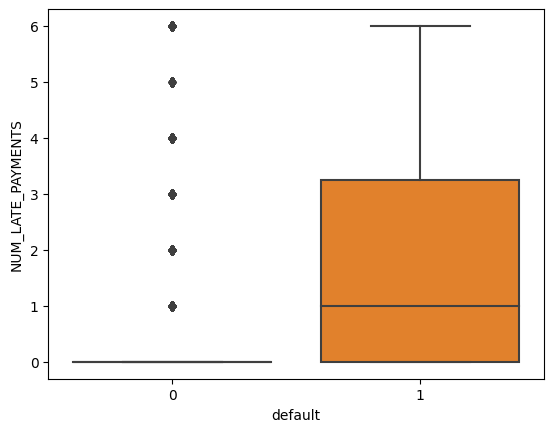

In [79]:
sns.boxplot(x='default', y='NUM_LATE_PAYMENTS', data=df)


In [80]:
# Target vs Key Features

group_means = df.groupby('default')[['LIMIT_BAL', 'AGE', 'AVG_BILL_AMT', 'NUM_LATE_PAYMENTS']].mean()
print(group_means)


             LIMIT_BAL        AGE  AVG_BILL_AMT  NUM_LATE_PAYMENTS
default                                                           
0        178099.726074  35.417266  45404.817975           0.504194
1        130109.656420  35.725738  43470.492591           1.996082
